___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [5]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [8]:
df=df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [26]:
df['review']=df['review'].apply(lambda x: x.strip())

In [30]:
len(df[df['review']==''])

27

In [31]:
df=df[df['review']!='']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [36]:
#CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [60]:
#CODE HERE
negword=df[df['label']=='neg']
posword=df[df['label']=='pos']

from sklearn.feature_extraction.text import CountVectorizer

def listwords(df_review):
    cv=CountVectorizer(stop_words='english')
    mat=cv.fit_transform(df_review)
    freq=zip(cv.get_feature_names_out(),mat.sum(axis=0).tolist()[0])
    print(sorted(freq, key=lambda x: -x[1])[:20])

In [61]:
print('Top 20 words used for Negative reviews.')
listwords(negword['review'])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [62]:
print('Top 20 words used for Positive reviews.')
listwords(posword['review'])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [64]:
#CODE HERE
x=df['review']
y=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [70]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [78]:
gb_pipe=Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('gb',GradientBoostingClassifier())])
gb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('gb', GradientBoostingClassifier())])

In [79]:
nb_pipe=Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('nb',MultinomialNB())])
nb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [80]:
log_pipe=Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('log',LogisticRegression())])
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('log', LogisticRegression())])

In [81]:
svc_pipe=Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('svc',LinearSVC())])
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [75]:
#CODE HERE
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(y_test,preds))
    print(confusion_matrix(y_test,preds))

In [88]:
print('gradient boosted performance report')
report(gb_pipe)

gradient boosted performance report
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('gb', GradientBoostingClassifier())]) performance report
              precision    recall  f1-score   support

         neg       0.78      0.82      0.80       191
         pos       0.82      0.77      0.79       197

    accuracy                           0.80       388
   macro avg       0.80      0.80      0.80       388
weighted avg       0.80      0.80      0.80       388

[[157  34]
 [ 45 152]]


In [89]:
print('MultinomialNB performance report')
report(nb_pipe)

MultinomialNB performance report
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())]) performance report
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388

[[166  25]
 [ 48 149]]


In [90]:
print('Logistic regression performance report')
report(log_pipe)

Logistic regression performance report
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('log', LogisticRegression())]) performance report
              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388

[[163  28]
 [ 41 156]]


In [91]:
print('LinearSVC performance report')
report(svc_pipe)

LinearSVC performance report
Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())]) performance report
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388

[[160  31]
 [ 37 160]]


              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



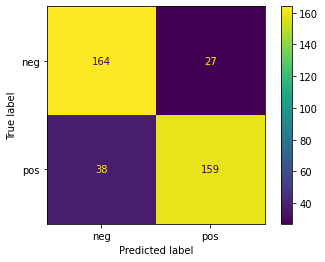

## Great job!